## Stationarity & Basic Concepts
### 1. Asset Returns

대부분의 금융 연구는 자산의 가격 대신 수익률을 사용한다. 그 이유는 다음과 같다
1. 일반 투자자들에게 자산의 수익은 투자 기회에 대한 완전하고 규모가 없는 요약이다
2. 전자가 더 매력적인 통계적 특성을 가지고 있기 때문에, 수익률 시계열은 가격 시계열보다 다루기 쉽다

**One period Simple Return**

$t-1$기부터 $t$기까지의 자산을 보유하였을 때의 simple growth return은 다음과 같이 표현할 수 있다

$$1 + R_t = \frac{P_t}{P_{t-1}}~~~~~\mbox{or}~~~~~P_t = P_{t-1}(1 + R_t)$$

simple net return 혹은 simple return은 다음과 같이 표현 가능하다

$$R_t = \frac{P_t - P_{t-1}}{P_{t-1}}$$

**Multiperiod Simple Return**

자산을 k 기간동안 보유하였을 때의 simple growth return은
$$1 + R_t[k] = \frac{P_t}{P_{t-k}} = (1 + R_t)(1+R_{t-1})\cdots(1+R_{t-k+1})=\prod_{j=0}^{k-1}(1+R_{t-j})$$
이다.

Annualized average return은 다음과 같이 정의한다

$$\mbox{Annualized}\{R_t[k]\} = \Big[ \prod_{j=0}^{k-1}(1+R_{t-j}) \Big]^{\frac{1}{k}} -1$$

계산의 편의를 위해 다음과 같이 쓰기도 한다

$$\mbox{Annualized}\{R_t[k]\} = \exp \Big[ \frac{1}{k} \sum_{j=0}^{k-1}\ln(1+R_{t-j}) \Big] -1$$

python에서 `pandas.DataFrame`의 `pct_change()` method를 사용하면 위와 같이 계산한다

**Continuously Compounded Return**

log 수익률을 사용하면 다음과 같은 이점이 있다.
1. 계산이 매우 편해진다
2. 비선형성이 감소한다
3. 정규분포를 따르게 된다
4. 수익률이 보수적으로 추정되기 때문에, 성과 지표로 비교하기 유용하다

log return은 다음과 같다

$$r_t = \ln(1 + R_t) = \ln\frac{P_t}{P_{t-1}} = p_t - p_{t-1}$$

여기에서 $p_t = \ln P_t$이다

**example 1**

Samsung Electronics의 수익률을 직접 구해 보자

In [1]:
import pandas_datareader as pdr
import datetime
import numpy as np
import pandas as pd

start_date = datetime.datetime(2020, 1, 1)
end_date = datetime.datetime(2023, 1, 1)
samsung = pdr.DataReader("005930", "naver", start_date, end_date).astype(int)

samsung

,Open,High,Low,Close,Volume
Date,,,,,
2020-01-02,55500,56000,55000,55200,12993228
2020-01-03,56000,56600,54900,55500,15422255
2020-01-06,54900,55600,54600,55500,10278951
2020-01-07,55700,56400,55600,55800,10009778
2020-01-08,56200,57400,55900,56800,23501171
...,...,...,...,...,...
2022-12-23,58200,58400,57700,58100,9829407
2022-12-26,58000,58100,57700,57900,6756411
2022-12-27,58000,58400,57900,58100,10667027


수익률은 보통 종가를 기준으로 계산한다

In [2]:
samsung['Close'].pct_change() # 백분율로 계산한 경우

Date
2020-01-02         NaN
2020-01-03    0.005435
2020-01-06    0.000000
2020-01-07    0.005405
2020-01-08    0.017921
                ...   
2022-12-23   -0.016920
2022-12-26   -0.003442
2022-12-27    0.003454
2022-12-28   -0.025818
2022-12-29   -0.022968
Name: Close, Length: 742, dtype: float64

In [3]:
ret = np.log(samsung.Close) - np.log(samsung.Close.shift(1)) # log return
ret

Date
2020-01-02         NaN
2020-01-03    0.005420
2020-01-06    0.000000
2020-01-07    0.005391
2020-01-08    0.017762
                ...   
2022-12-23   -0.017065
2022-12-26   -0.003448
2022-12-27    0.003448
2022-12-28   -0.026157
2022-12-29   -0.023236
Name: Close, Length: 742, dtype: float64

<AxesSubplot:xlabel='Date'>

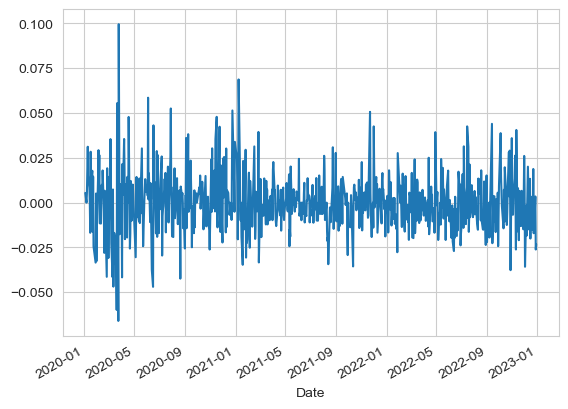

In [4]:
ret.plot()

### Exercise 1
pandas datareader 혹은 Financial Datareader를 이용하여 Apple의 주가를 가져와 3년치 수익률을 직접 구해 보자

### 2. Distributional Properties of Returns

수익률을 분석하기 위해서는 기본적인 통계적 특성들을 알아야 한다

**Review**

first moments (mean)
$$\hat{μ} = \frac{1}{T}\sum_{t=1}^T x_t$$

second moments (variance)
$$\hat{σ_x^2} = \frac{1}{T-1}\sum_{t=1}^T (x_t - \hat\mu_x)^2$$

third moments (skewness)
$$\hat{S}(x) = \frac{1}{(T-1)\hat\sigma_x^3}\sum_{t=1}^T(x_t-\hat\mu_x)^3$$
$$t = \frac{\hat S (r)}{\sqrt{6/T}}$$

forth moments (kurtosis)
$$\hat{K}(x) = \frac{1}{(T-1)\hat\sigma_x^4}\sum_{t=1}^T(x_t - \hat\mu_x)^4$$
$$t = \frac{\hat K (r) - 3}{\sqrt{24/T}}$$

Jarque Bera Statistic
$$\mathbf{JB} = \frac{\hat S^2 (r)}{\sqrt{6/T}} + \frac{(\hat K (r) - 3)^2}{\sqrt{24/T}}$$

In [5]:
ret.mean() # mean

2.442584676436007e-06

In [6]:
ret.var() # variance

0.0002768842404960849

In [7]:
ret.skew() # skewness

0.5548720113993226

In [8]:
ret.kurt() # kurtosis

2.9142493879356315

금융 데이터는 대부분 정규분포보다는 약간 치우쳐져 있고(skewness), 첨도가 더 높은(kurtosis) 경향이 있다

/Users/tommylee/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/tommylee/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'return distribution')

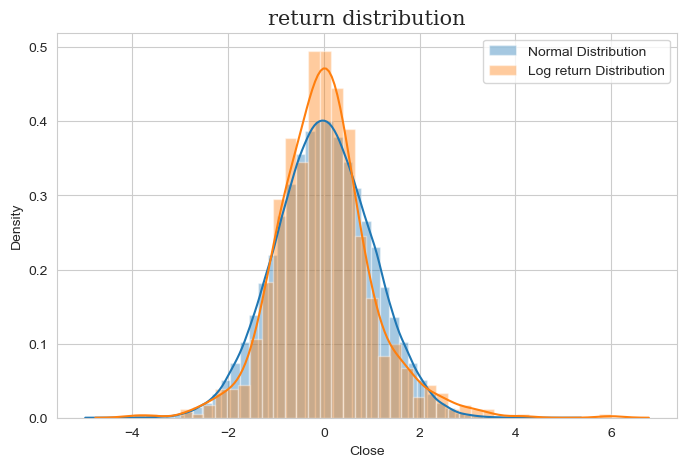

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
fig, ax1 = plt.subplots(figsize=(8,5), dpi=100)
sns.distplot(np.random.normal(size=100000), kde = True, ax = ax1, label = 'Normal Distribution')
sns.distplot((ret - ret.mean())/ret.std(), kde = True, rug = False, ax = ax1, label = 'Log return Distribution')
plt.legend()
plt.title('return distribution', fontsize = 15, fontfamily = 'Serif')

### Exercise 2
pandas datareader 혹은 Financial Datareader를 이용하여 Apple의 주가를 가져와 3년치 수익률의 평균, 분산, 왜도, 첨도를 모두 구해보고 정규분포와 비교해 보자

### 3. Stationarity

- strict stationarity
    - 임의의 자연수 $t_1, t_2, \cdots, t_n$과 자연수 k에 대하여 n개의 확률변수에 대한 결합확률밀도함수와, 이 n개의 확률변수에서 k만큼의 시간 축을 이동하였을 때의 결합확률밀도함수가 동일하다면, 이 시계열은 강정상성(Strict Stationarity)를 갖는다고 한다.
    - 따라서 어떤 확률과정이 강정상성 조건을 만족한다면 모든 n에 대하여 결합확률밀도함수가 시간대를 바꾸어도 동일하다는 것을 보여야 하므로, 어떠한 시간대이든 분포가 항상 동일해야 한다.

- weak stationarity
    - 확률과정이 유한한 2차 적률(**Finite Second Moment**)을 갖고, 기댓값과 분산이 시점 t와 무관하게 항상 일정하며 자기공분산이 시점 t가 아닌 시차 k에 의존한다면 이를 약한 의미의 정상성을 갖는다고 한다.
    - $\mathrm{E}(Z_t) = \mu,~~ \mu \in \mathbf{R}$
    - $\mathrm{Var}(Z_t) = \sigma ^ 2, ~~ \sigma ^ 2 \in \mathbf{R}$
    - $\mathrm{Cov}(Z_t, Z_{t+k}) = \sigma_K, ~~\mathrm{for~any~t,h \geq 1}$
    - 대표적인 약정상성을 가진 확률과정을 **White Noise Process**라고 한다